# Análisis de Algoritmos ICI522

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

# Costo Constante

El costo constante se refiere al caso cuando el algoritmo tiene costo invariante al tamaño del problema $\mathcal{O}(1)$

In [1]:
def square_exp(n):
    return n**2

def square(n):
    return n*n

print('El cuadrado de 10 es : %5d'%square(10))
print('El cuadrado de 1000 es : %5d'%square(1e3))

El cuadrado de 10 es :   100
El cuadrado de 1000 es : 1000000


# Costo Lineal

El costo lineal se refiere al caso cuando el algoritmo tiene costo lineal con respecto al tamaño del problema $\mathcal{O}(n)$

In [2]:
def cumsum(n):
    j=0
    for i in range(int(n)):
        j=j+i
    return j

print('La suma acumulativa de 10 es : %5d'%cumsum(10))
print('La suma acumulativa de 1000 es : %5d'%cumsum(1e3))

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


In [22]:
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def reject_outliers(x,y, m=2):
    x=np.array(x)
    y=np.array(y)
    index=abs(y - np.mean(y)) < m * np.std(y)
    return x[index],y[index]

def detrend(x,y,degree):
    model = np.polyfit(x,y,degree)
    predicted = np.polyval(model,x)
    return predicted

def plot_cost(n,fun,deg,title):
    x=range(int(n))
    y=[]
    for i in x:
        start=time.clock()
        fun(i)
        end=time.clock()
        y.append(end-start)
    x,y=reject_outliers(x,y)
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.xlabel('Tiempo')
    plt.hist(y, alpha=0.5)
    plt.subplot(2, 1, 2)
    z=detrend(x,y,deg)
    plt.plot(x,y)
    plt.plot(x,z)
    plt.ylabel('Tiempo')
    plt.xlabel('n')
    plt.show()
    
def compare_cost(n,fun1,fun2,deg,title):
    x=range(int(n))
    y1=[]
    y2=[]
    for i in x:
        start=time.clock()
        fun1(i)
        end=time.clock()
        y1.append(end-start)
    for i in x:
        start=time.clock()
        fun2(i)
        end=time.clock()
        y2.append(end-start)
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.xlabel('Tiempo')
    plt.hist(y1, alpha=0.5)
    plt.hist(y2, alpha=0.5)
    plt.subplot(2, 1, 2)
    z1=detrend(x,y1,deg)
    plt.plot(x,y1,alpha=.5)
    plt.plot(x,z1)
    z2=detrend(x,y2,deg)
    plt.plot(x,y2,alpha=.5)
    plt.plot(x,z2)    
    plt.ylabel('Tiempo')
    plt.xlabel('n')
    plt.show()
    return x,y1,y2

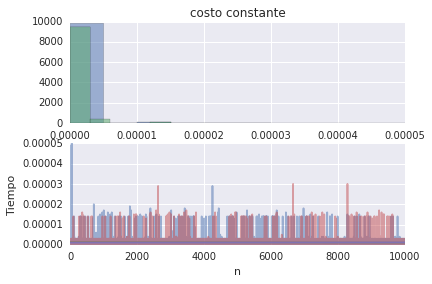

In [23]:
x,y1,y2=compare_cost(1e4,square_exp,square,1,"costo constante")

In [30]:
from scipy import stats
import statsmodels.api as sm

print('Tiempo promedio de la funcion f(x)=x**2 : %4e'%np.mean(y1))
print('Tiempo promedio de la funcion f(x)=x*x : %4e'%np.mean(y2))

print stats.ttest_ind(y1,y2)


Tiempo promedio de la funcion f(x)=x**2 : 1.195100e-06
Tiempo promedio de la funcion f(x)=x*x : 1.119700e-06
Ttest_indResult(statistic=2.702528698404505, pvalue=0.0068872326224503275)


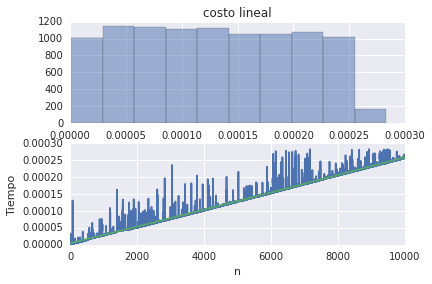

In [31]:
plot_cost(1e4,cumsum,2,"costo lineal")